# Scenario
* You are tasked with investigating customer churn
    * churn: when a customer quits a service.  High churn rate = bad for business.
* in the `data/` folder is a the dataset you will be working on. 


# Complete the following
* Find features that are high indicators of churn and build visualizations
* Build a model to predict churn. You can build any model you want including
    * Logistic Regression 
    * KNN
    * Bayesian Classifiers
* Choose an evaluation metric for your model
    * Accuracy vs Precision vs Recall vs F1
* Explain why you chose that Metric
* Apply a GridsearchCV to find the best hyper parameters for your model
* After you build your final model you must have
    * A confusion matrix supporting your model
    * Final Metric Score
* Make sure you have a validation set for your data


# Can you
* Work in groups? Yes
* Ask cohort-mates for help/advice? Yes
* Check what you did with a cohort-mate? Yes
* Ask me for advice? Yes

This is an opportunity to practice some ML before the Phase 3 project. 


## things to remember
* A data scientist is good at finding key insights to problems not just building models
* validate your model with a confusion matrix and have a validation set

# Setting the random state
Below we set a default random state for all randomized computations.

In [1]:
random_state = 42

# Data Validation
In this section we will import and inspect the data to ensure that our data is complete, correctly encoded, and 

## Validation Reports
Below we inspect the data using some standard reports 

In [2]:
import pandas as pd

df = pd.read_csv('data/Churn_Modelling.csv', index_col='RowNumber')
print(df.info())
for column in df.columns:
    if df[column].dtype == object:
        print(f"\n== {column}==")
        print(df[column].value_counts())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB
None

== Surname==
Smith         32
Scott         29
Martin        29
Walker        28
Brown         26
              ..
Ruth           1
U

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Validation Conclusions
* The data is complete. 
* We will drop `CustomerId` and `Surname` from the model since they are unlikely to contain any meaningful information.
* We need to dummify `Gender` and `Geography`.

# Checking for class imbalance

In [16]:
y_train.value_counts(normalize=True)

0    0.7945
1    0.2055
Name: Exited, dtype: float64

# Holding out Test data for model validation.
In this section, we split the provided data into a training set, which will be used for training and cross validation, and a test set, which will be used for model validation. We will use 20% of our data for validation and 80% for training.

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Exited',axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)

# Building our pipeline
In this section we build a pipeline.

In [160]:
# Pipline
from imblearn.pipeline import Pipeline

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Resampler
from imblearn.over_sampling import SMOTE

# Model evaluation
from sklearn.metrics import plot_confusion_matrix

# Base estimator
from sklearn.base import BaseEstimator

class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

numerical_features = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]

categorical_features = [
    'Geography',
    'Gender'
]

pass_features = [
    'HasCrCard',
    'IsActiveMember'
]

drop_features = [
    'CustomerId',
    'Surname'
]



pipeline = Pipeline(
    steps=[
        ('preprocessor', ColumnTransformer([
            ('numericalPreprocessor', StandardScaler(), numerical_features),
            ('categoricalPreprocessor', OneHotEncoder(drop='first'), categorical_features),
            ('passProcessor', 'passthrough', pass_features),
            ('dropProcessor', 'drop', drop_features)
        ])),
        ('resampler', SMOTE(random_state=random_state,)),
        ('classifier', DummyEstimator())
    ]
)



# Grid Search
We chose to score our models on recall since identifying users who are likely to leave is the primary concern.

In [197]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
# Scoriing
from sklearn.metrics import f1_score
parameter_grid = [
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': range(3, 11, 2),
        'classifier__p': range(1, 5),
        'classifier__weights': ['uniform', 'distance']
    },
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [1, 1e-2, 1e-4, 1e-8, 1e-16],
        'classifier__penalty': ['l1', 'l2']
    },
    {
        'classifier': [GaussianNB()],
        'classifier__var_smoothing': [1e-9, 1e-5, 1e-1]
    },
]
grid_search = GridSearchCV(pipeline, parameter_grid, n_jobs=-1, scoring='recall')

# Finding the best model

In [198]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numericalPreprocessor',
                                                                         StandardScaler(),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'NumOfProducts',
                                                                          'EstimatedSalary']),
                                                                        ('categoricalPreprocessor',
                                                                         OneHotEncoder(drop='first'),
                            

## Best Model

In [199]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numericalPreprocessor',
                                                  StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('categoricalPreprocessor',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography', 'Gender']),
                                                 ('passProcessor',
                                                  'passthrough',
                                                  ['HasCrCard',
                                                   'IsActiveMember']),
                                        

# Best model recall

In [200]:
grid_search.best_score_

0.7506946714612617

## Confusion matrix for best model

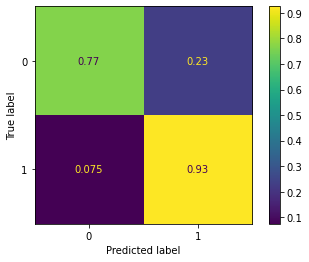

In [203]:
plot_confusion_matrix(grid_search.best_estimator_, X_train, y_train, normalize='true')

# Validation

In [204]:
grid_search.score(X_test, y_test)

0.7633587786259542

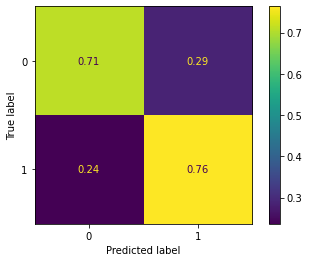

In [206]:
plot_confusion_matrix(grid_search.best_estimator_, X_test, y_test, normalize='true')